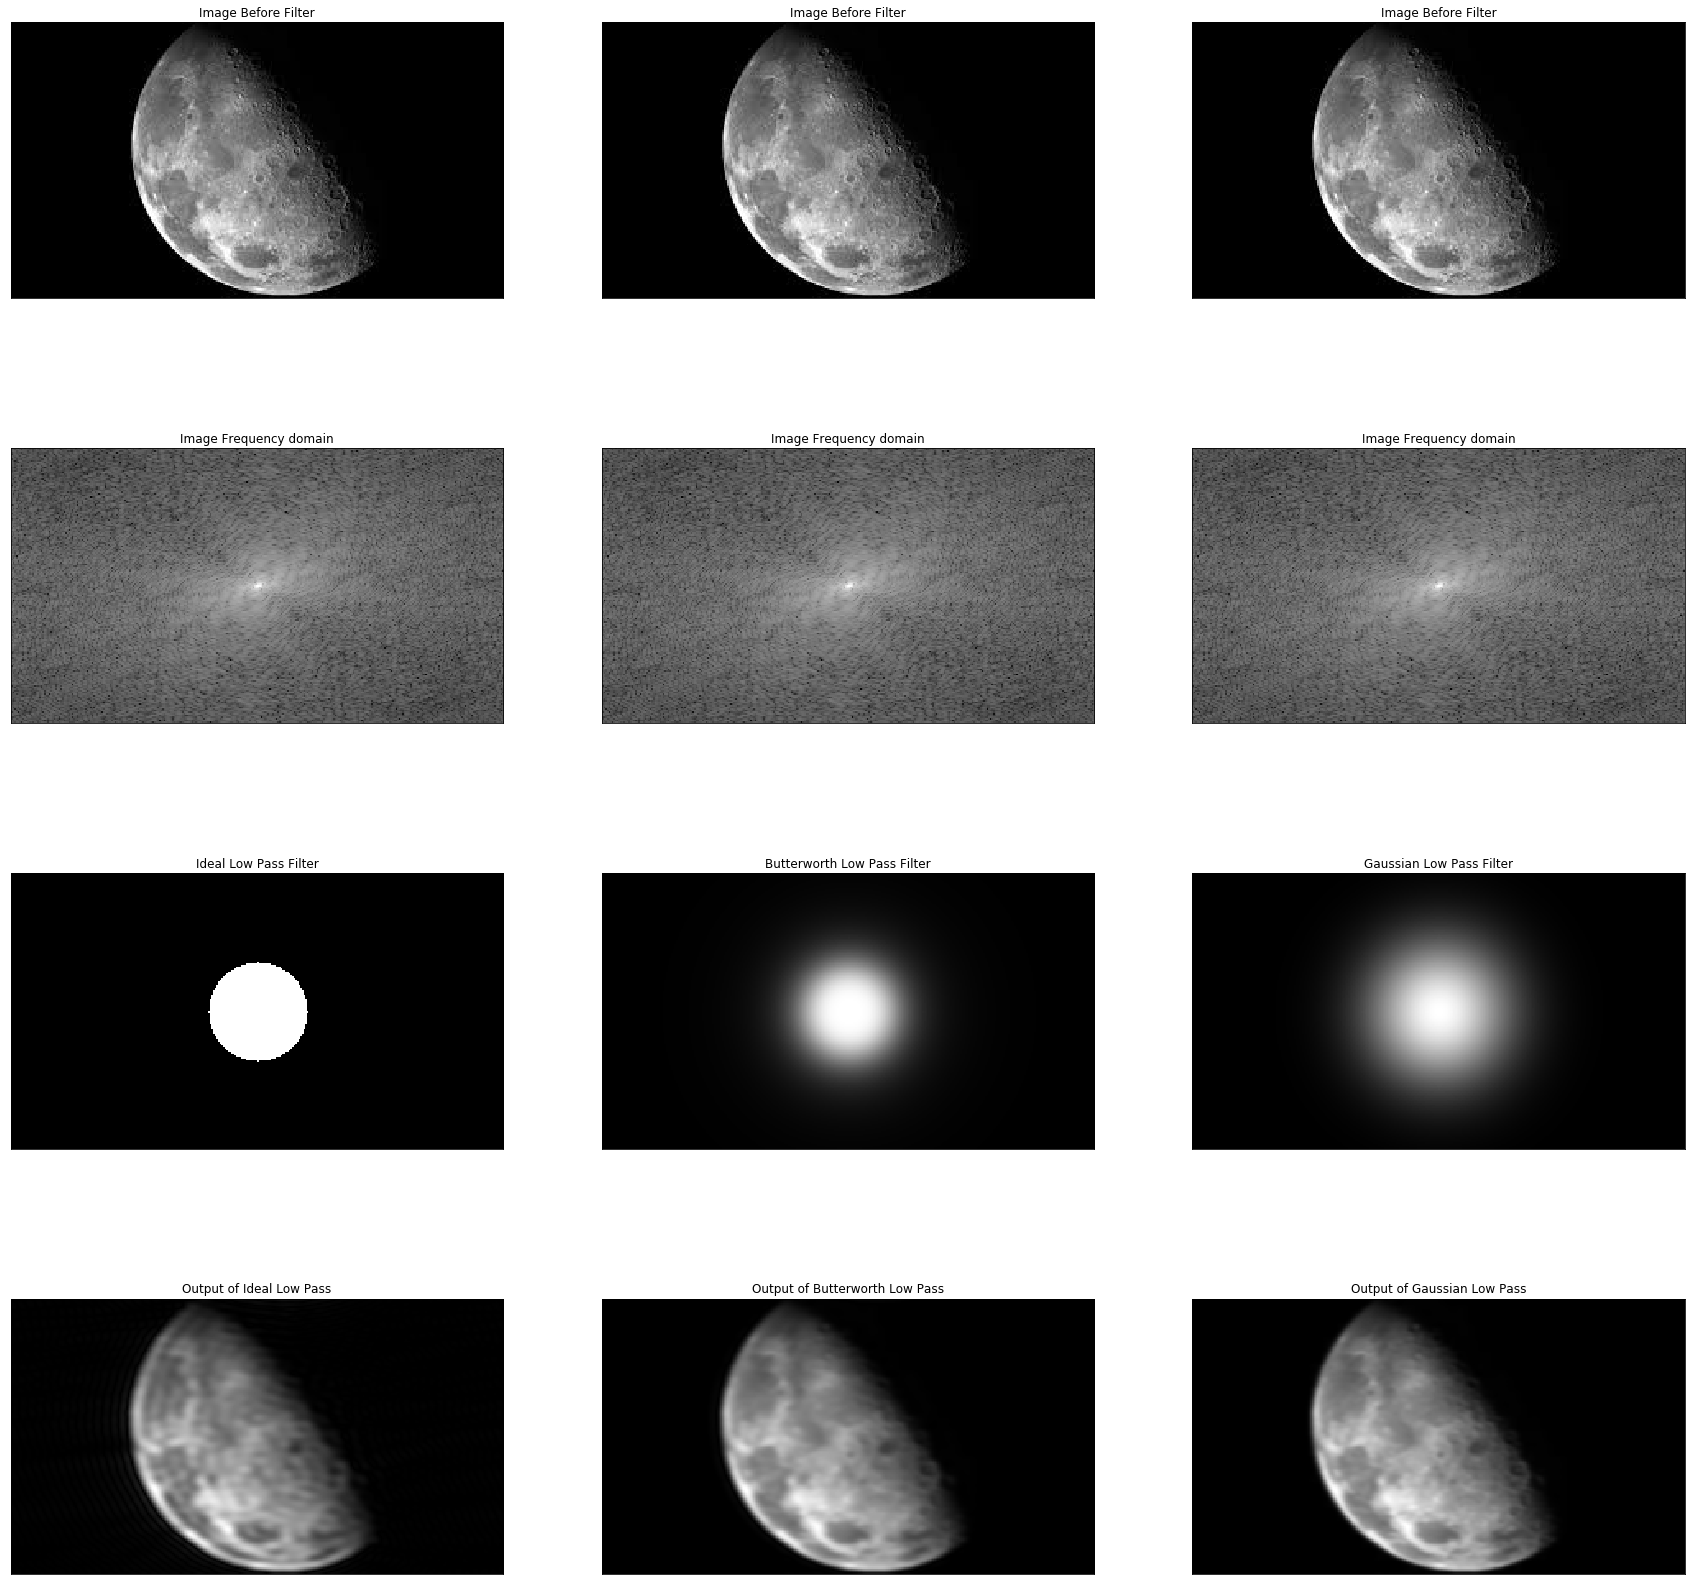

In [4]:
import numpy, math
import scipy.misc
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack as fftim
img=cv2.imread('moon.jpg',0)


dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgfreq = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)



col,row=img.shape
M,N=img.shape


def D(u,v):
    value=((u-M/2)**2)+((v-N/2)**2)
    return value**0.5

Dz=30

#Ideal Low Pass  Filter
#----------------------------------------
H1=np.zeros((M,N))
for u in range(M):
    for v in range(N):
        if Dz>=D(u,v):H1[u,v]=1
IdelFilter = scipy.misc.toimage(H1)
convolution1 = dft_shift * IdelFilter 
IdelFilter = abs(fftim.ifft2(convolution1))

#----------------------------------------


# Butterworth  Low Pass Filter
#----------------------------------------
n=2
H2=np.zeros((M,N))
for u in range(M):
    for v in range(N):
        value=1/(1+((D(u,v)/Dz)**(n**2)))
        H2[u,v]=value
butterworth = scipy.misc.toimage(H2)
convolution2 = dft_shift * butterworth
butterworth = abs(fftim.ifft2(convolution2))

#----------------------------------------


# Gaussian Filter Low Pass
#----------------------------------------
H3=np.zeros((M,N))
for u in range(M):
    for v in range(N):
        value=math.exp((-1*((D(u,v)**2))/(2*(Dz**2))))
        H3[u,v]=value

gaussian = scipy.misc.toimage(H3)
convolution3 = dft_shift * gaussian 
gaussian = abs(fftim.ifft2(convolution3))
#----------------------------------------


filters = [img,img,img,imgfreq,imgfreq,imgfreq,
           H1,H2,H3,IdelFilter,butterworth,gaussian]
filter_name = ["Image Before Filter","Image Before Filter","Image Before Filter",
               "Image Frequency domain","Image Frequency domain","Image Frequency domain",
               'Ideal Low Pass Filter','Butterworth Low Pass Filter',"Gaussian Low Pass Filter",
               "Output of Ideal Low Pass","Output of Butterworth Low Pass","Output of Gaussian Low Pass"]


fig = plt.figure(figsize=(30,30))

for i in range(12):
    plt.subplot(4,3,i+1),plt.imshow(filters[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

High pass Filter


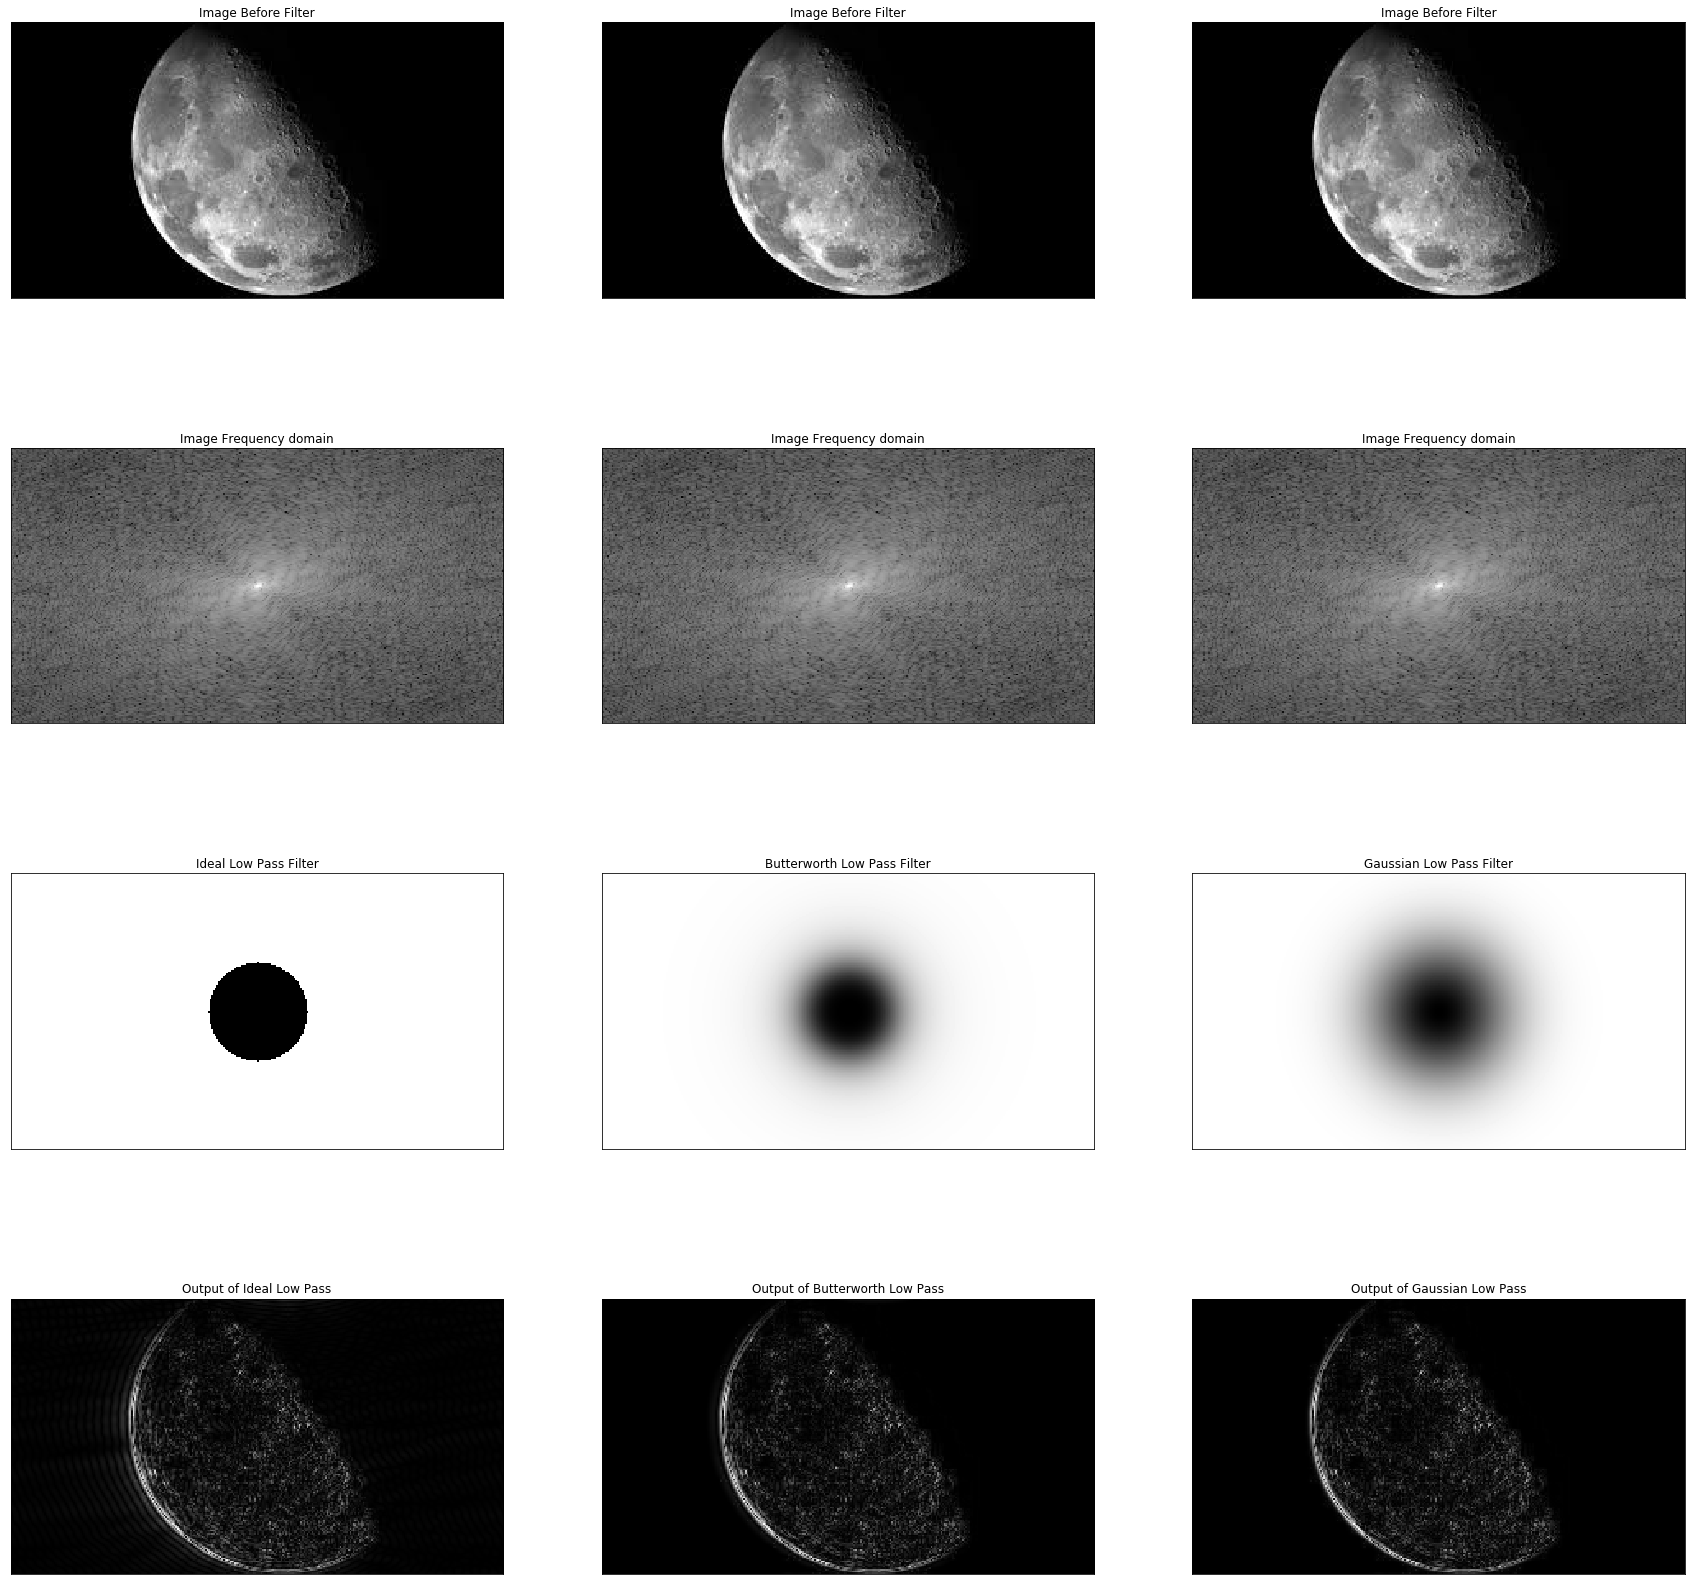

In [6]:

#Ideal High Pass  Filter
#----------------------------------------
H4=1-H1
IdelFilter = scipy.misc.toimage(H4)
convolution1 = dft_shift * IdelFilter 
IdelFilter = abs(fftim.ifft2(convolution1))

#----------------------------------------


# Butterworth  High Pass Filter
#----------------------------------------
H5=1-H2
butterworth = scipy.misc.toimage(H5)
convolution2 = dft_shift * butterworth
butterworth = abs(fftim.ifft2(convolution2))

#----------------------------------------


# Gaussian Filter High Pass
#----------------------------------------
H6=1-H3
gaussian = scipy.misc.toimage(H6)
convolution3 = dft_shift * gaussian 
gaussian = abs(fftim.ifft2(convolution3))
#----------------------------------------


filters = [img,img,img,imgfreq,imgfreq,imgfreq,
           H4,H5,H6,IdelFilter,butterworth,gaussian]
filter_name = ["Image Before Filter","Image Before Filter","Image Before Filter",
               "Image Frequency domain","Image Frequency domain","Image Frequency domain",
               'Ideal Low Pass Filter','Butterworth Low Pass Filter',"Gaussian Low Pass Filter",
               "Output of Ideal Low Pass","Output of Butterworth Low Pass","Output of Gaussian Low Pass"]


fig = plt.figure(figsize=(30,30))

for i in range(12):
    plt.subplot(4,3,i+1),plt.imshow(filters[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()